# Raw Data (Input)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

df = pd.read_csv('Form_Responses.csv')

# 1. Data Pre-processing

In [2]:
#Sanity check to see if data is loaded correctly
df.head(5)

,Age,Gender,Current_Level_of_Studies,Field_of_Study,Type_of_Institution,Academic_Satisfaction,Study_Hours_Per_Week,Academic_Engagement,Academic_Workload,Coursework_Pressure,...,gad3,gad4,gad5,gad6,gad7,Depression_Score,Anxiety_Score,Total_Score,Depressed_Anxious,Feelings_Emotions_Over_Past_2_Weeks
0,22,Female,Degree,"STEM (e.g., Science, Technology, Engineering, ...",Private,4 : Satisfied,1,3 : Moderately engaged,4 : Heavy,5 : Very high,...,3,3,3,3,3,27,21,48,Severe,"Like emotionless, not in the mood to do anythi..."
1,22,Male,Degree,"STEM (e.g., Science, Technology, Engineering, ...",Private,3 : Neutral,2,3 : Moderately engaged,3 : Moderate,3 : Moderate,...,1,1,0,1,1,4,5,9,Minimal and Mild,Mixed feelings
2,20,Male,Degree,"STEM (e.g., Science, Technology, Engineering, ...",Public,4 : Satisfied,20,3 : Moderately engaged,3 : Moderate,3 : Moderate,...,1,1,1,0,1,6,6,12,Minimal and Mild,Overthinking
3,23,Female,Degree,"STEM (e.g., Science, Technology, Engineering, ...",Private,3 : Neutral,3,2 : Slightly engaged,5 : Very heavy,5 : Very high,...,3,3,3,3,3,27,21,48,Severe,"I think because of my fyp, i began to stressed..."
4,20,Male,Degree,"STEM (e.g., Science, Technology, Engineering, ...",Private,4 : Satisfied,15,3 : Moderately engaged,4 : Heavy,3 : Moderate,...,0,0,0,0,0,0,0,0,Minimal and Mild,Calm and looking forward for the future


In [ ]:
#Sanity check for data cleaning
df.shape

(312, 42)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 42 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  312 non-null    int64  
 1   Gender                               312 non-null    object 
 2   Current_Level_of_Studies             312 non-null    object 
 3   Field_of_Study                       312 non-null    object 
 4   Type_of_Institution                  312 non-null    object 
 5   Academic_Satisfaction                312 non-null    object 
 6   Study_Hours_Per_Week                 312 non-null    int64  
 7   Academic_Engagement                  312 non-null    object 
 8   Academic_Workload                    312 non-null    object 
 9   Coursework_Pressure                  312 non-null    object 
 10  Academic_Performance                 312 non-null    object 
 11  Sleep_Hours_Per_Night           

In [5]:
df.tail(5)

,Age,Gender,Current_Level_of_Studies,Field_of_Study,Type_of_Institution,Academic_Satisfaction,Study_Hours_Per_Week,Academic_Engagement,Academic_Workload,Coursework_Pressure,...,gad3,gad4,gad5,gad6,gad7,Depression_Score,Anxiety_Score,Total_Score,Depressed_Anxious,Feelings_Emotions_Over_Past_2_Weeks
307,20,Male,Degree,"STEM (e.g., Science, Technology, Engineering, ...",Private,3 : Neutral,3,2 : Slightly engaged,3 : Moderate,5 : Very high,...,0,0,0,1,0,7,1,8,Minimal and Mild,i want to finish this fucking degree so baddd
308,19,Male,Degree,"Social Sciences (e.g., Psychology, Sociology, ...",Private,3 : Neutral,18,3 : Moderately engaged,3 : Moderate,4 : High,...,2,0,0,1,0,3,4,7,Minimal and Mild,"I fell stressed,restless."
309,20,Male,Degree,"STEM (e.g., Science, Technology, Engineering, ...",Private,3 : Neutral,5,3 : Moderately engaged,3 : Moderate,3 : Moderate,...,1,1,1,1,1,7,7,14,Minimal and Mild,Okay
310,23,Male,Degree,"STEM (e.g., Science, Technology, Engineering, ...",Private,4 : Satisfied,10,3 : Moderately engaged,3 : Moderate,2 : Low,...,1,0,0,1,1,2,5,7,Minimal and Mild,A little nervous
311,19,Male,Foundation,"STEM (e.g., Science, Technology, Engineering, ...",Private,5 : Very satisfied,15,4: Mostly engaged,1 : Very light,3 : Moderate,...,0,0,0,0,0,0,0,0,Minimal and Mild,happy and surprised


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,312.0,20.179487,2.636589,1.0,19.00,19.0,21.00,46.0
Study_Hours_Per_Week,312.0,8.910256,10.279610,0.0,3.00,5.0,10.00,65.0
Sleep_Hours_Per_Night,312.0,5.855769,1.555521,2.0,5.00,6.0,7.00,15.0
phq1,312.0,1.368590,0.904814,0.0,1.00,1.0,2.00,3.0
phq2,312.0,0.980769,0.863487,0.0,0.00,1.0,1.00,3.0
phq3,312.0,1.419872,1.054765,0.0,1.00,1.0,2.00,3.0
phq4,312.0,1.500000,0.942051,0.0,1.00,1.0,2.00,3.0
phq5,312.0,1.067308,0.958272,0.0,0.00,1.0,2.00,3.0
phq6,312.0,1.176282,1.047589,0.0,0.00,1.0,2.00,3.0
phq7,312.0,0.983974,0.977101,0.0,0.00,1.0,1.25,3.0


In [7]:
df.dtypes

Age                                      int64
Gender                                  object
Current_Level_of_Studies                object
Field_of_Study                          object
Type_of_Institution                     object
Academic_Satisfaction                   object
Study_Hours_Per_Week                     int64
Academic_Engagement                     object
Academic_Workload                       object
Coursework_Pressure                     object
Academic_Performance                    object
Sleep_Hours_Per_Night                  float64
Eating_Nutrition_Habits                 object
Physical_Activity_Freq                  object
Social_Support                          object
Romantic_Satisfaction                   object
Financial_Stress                        object
CoCurricular_Involvement                object
Isolation_Frequency                     object
Family_History_Mental_Illness           object
Recent_Suicidal_Thoughts                object
phq1         

In [8]:
#Check frequency tables to understand the data distribution
for column in df.columns:
    print(f"Frequency table for {column}:")
    print(df[column].value_counts())
    print("\n")

Frequency table for Age:
Age
19    139
20     52
21     38
22     29
18     21
23     11
24      7
25      7
31      2
26      2
1       1
46      1
17      1
27      1
Name: count, dtype: int64


Frequency table for Gender:
Gender
Female    167
Male      145
Name: count, dtype: int64


Frequency table for Current_Level_of_Studies:
Current_Level_of_Studies
Degree        167
Foundation    114
Diploma        31
Name: count, dtype: int64


Frequency table for Field_of_Study:
Field_of_Study
STEM (e.g., Science, Technology, Engineering, Mathematics, etc.)                 272
Social Sciences (e.g., Psychology, Sociology, Education, Communication, etc.)     30
Other                                                                              8
Health Science                                                                     1
Aviation Management                                                                1
Name: count, dtype: int64


Frequency table for Type_of_Institution:
Type_of_Instit

In [9]:
#finding the missing values in each column
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Age                                    0
Gender                                 0
Current_Level_of_Studies               0
Field_of_Study                         0
Type_of_Institution                    0
Academic_Satisfaction                  0
Study_Hours_Per_Week                   0
Academic_Engagement                    0
Academic_Workload                      0
Coursework_Pressure                    0
Academic_Performance                   0
Sleep_Hours_Per_Night                  0
Eating_Nutrition_Habits                0
Physical_Activity_Freq                 0
Social_Support                         0
Romantic_Satisfaction                  0
Financial_Stress                       0
CoCurricular_Involvement               0
Isolation_Frequency                    0
Family_History_Mental_Illness          0
Recent_Suicidal_Thoughts               0
phq1                                   0
phq2                                   0
phq3                      

In [10]:
#Check and Finding for Duplicate Rows
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows.shape[0])
print(duplicate_rows)

Number of duplicate rows:  0
Empty DataFrame
Columns: [Age, Gender, Current_Level_of_Studies, Field_of_Study, Type_of_Institution, Academic_Satisfaction, Study_Hours_Per_Week, Academic_Engagement, Academic_Workload, Coursework_Pressure, Academic_Performance, Sleep_Hours_Per_Night, Eating_Nutrition_Habits, Physical_Activity_Freq, Social_Support, Romantic_Satisfaction, Financial_Stress, CoCurricular_Involvement, Isolation_Frequency, Family_History_Mental_Illness, Recent_Suicidal_Thoughts, phq1, phq2, phq3, phq4, phq5, phq6, phq7, phq8, phq9, gad1, gad2, gad3, gad4, gad5, gad6, gad7, Depression_Score, Anxiety_Score, Total_Score, Depressed_Anxious, Feelings_Emotions_Over_Past_2_Weeks]
Index: []

[0 rows x 42 columns]


In [11]:
#identify gargabe values 
#include object columns as garbage values are usually in categorical columns
for i in df.select_dtypes(include=['number', 'object']).columns:
    print(df[i].value_counts())
    print("****************************")

Age
19    139
20     52
21     38
22     29
18     21
23     11
24      7
25      7
31      2
26      2
1       1
46      1
17      1
27      1
Name: count, dtype: int64
****************************
Gender
Female    167
Male      145
Name: count, dtype: int64
****************************
Current_Level_of_Studies
Degree        167
Foundation    114
Diploma        31
Name: count, dtype: int64
****************************
Field_of_Study
STEM (e.g., Science, Technology, Engineering, Mathematics, etc.)                 272
Social Sciences (e.g., Psychology, Sociology, Education, Communication, etc.)     30
Other                                                                              8
Health Science                                                                     1
Aviation Management                                                                1
Name: count, dtype: int64
****************************
Type_of_Institution
Private    160
Public     152
Name: count, dtype: int64
******

In [ ]:
numeric_cols = df.select_dtypes(include=['number', 'object']).columns.tolist()

for col in numeric_cols:
    zeros = df[col] == 0
    if zeros.any():
        print(f"\nZero values found in: {col}")
        print(df.loc[zeros, col].value_counts())


Zero values found in: Study_Hours_Per_Week
Study_Hours_Per_Week
0    10
Name: count, dtype: int64

Zero values found in: phq1
phq1
0    44
Name: count, dtype: int64

Zero values found in: phq2
phq2
0    95
Name: count, dtype: int64

Zero values found in: phq3
phq3
0    66
Name: count, dtype: int64

Zero values found in: phq4
phq4
0    39
Name: count, dtype: int64

Zero values found in: phq5
phq5
0    96
Name: count, dtype: int64

Zero values found in: phq6
phq6
0    97
Name: count, dtype: int64

Zero values found in: phq7
phq7
0    117
Name: count, dtype: int64

Zero values found in: phq8
phq8
0    160
Name: count, dtype: int64

Zero values found in: phq9
phq9
0    201
Name: count, dtype: int64

Zero values found in: gad1
gad1
0    92
Name: count, dtype: int64

Zero values found in: gad2
gad2
0    101
Name: count, dtype: int64

Zero values found in: gad3
gad3
0    82
Name: count, dtype: int64

Zero values found in: gad4
gad4
0    125
Name: count, dtype: int64

Zero values found in: ga


# Remove remove unnecessary column

In [13]:
df = df.drop(columns=[
    "phq1", "phq2", "phq3", "phq4", "phq5", "phq6", "phq7", "phq8", "phq9",
    "gad1", "gad2", "gad3", "gad4", "gad5", "gad6", "gad7", "Total_Score", "Depression_Score", "Anxiety_Score"
])

# Check for missing value

In [14]:
#finding the missing values in each column
missing_values = df.isnull().sum()

print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Age                                    0
Gender                                 0
Current_Level_of_Studies               0
Field_of_Study                         0
Type_of_Institution                    0
Academic_Satisfaction                  0
Study_Hours_Per_Week                   0
Academic_Engagement                    0
Academic_Workload                      0
Coursework_Pressure                    0
Academic_Performance                   0
Sleep_Hours_Per_Night                  0
Eating_Nutrition_Habits                0
Physical_Activity_Freq                 0
Social_Support                         0
Romantic_Satisfaction                  0
Financial_Stress                       0
CoCurricular_Involvement               0
Isolation_Frequency                    0
Family_History_Mental_Illness          0
Recent_Suicidal_Thoughts               0
Depressed_Anxious                      0
Feelings_Emotions_Over_Past_2_Weeks    1
dtype: int64


In [15]:
#handle missing_values
df = df.drop(columns= 'Feelings_Emotions_Over_Past_2_Weeks')

In [16]:
# check columns after delete
df.columns

Index(['Age', 'Gender', 'Current_Level_of_Studies', 'Field_of_Study',
       'Type_of_Institution', 'Academic_Satisfaction', 'Study_Hours_Per_Week',
       'Academic_Engagement', 'Academic_Workload', 'Coursework_Pressure',
       'Academic_Performance', 'Sleep_Hours_Per_Night',
       'Eating_Nutrition_Habits', 'Physical_Activity_Freq', 'Social_Support',
       'Romantic_Satisfaction', 'Financial_Stress', 'CoCurricular_Involvement',
       'Isolation_Frequency', 'Family_History_Mental_Illness',
       'Recent_Suicidal_Thoughts', 'Depressed_Anxious'],
      dtype='object')

# Encode

In [17]:
numeric_cols = df.select_dtypes(include=['number']).columns
print(numeric_cols)

non_numeric_cols = df.select_dtypes(exclude=['number']).columns
print(non_numeric_cols)

Index(['Age', 'Study_Hours_Per_Week', 'Sleep_Hours_Per_Night'], dtype='object')
Index(['Gender', 'Current_Level_of_Studies', 'Field_of_Study',
       'Type_of_Institution', 'Academic_Satisfaction', 'Academic_Engagement',
       'Academic_Workload', 'Coursework_Pressure', 'Academic_Performance',
       'Eating_Nutrition_Habits', 'Physical_Activity_Freq', 'Social_Support',
       'Romantic_Satisfaction', 'Financial_Stress', 'CoCurricular_Involvement',
       'Isolation_Frequency', 'Family_History_Mental_Illness',
       'Recent_Suicidal_Thoughts', 'Depressed_Anxious'],
      dtype='object')


# Check for Outliers

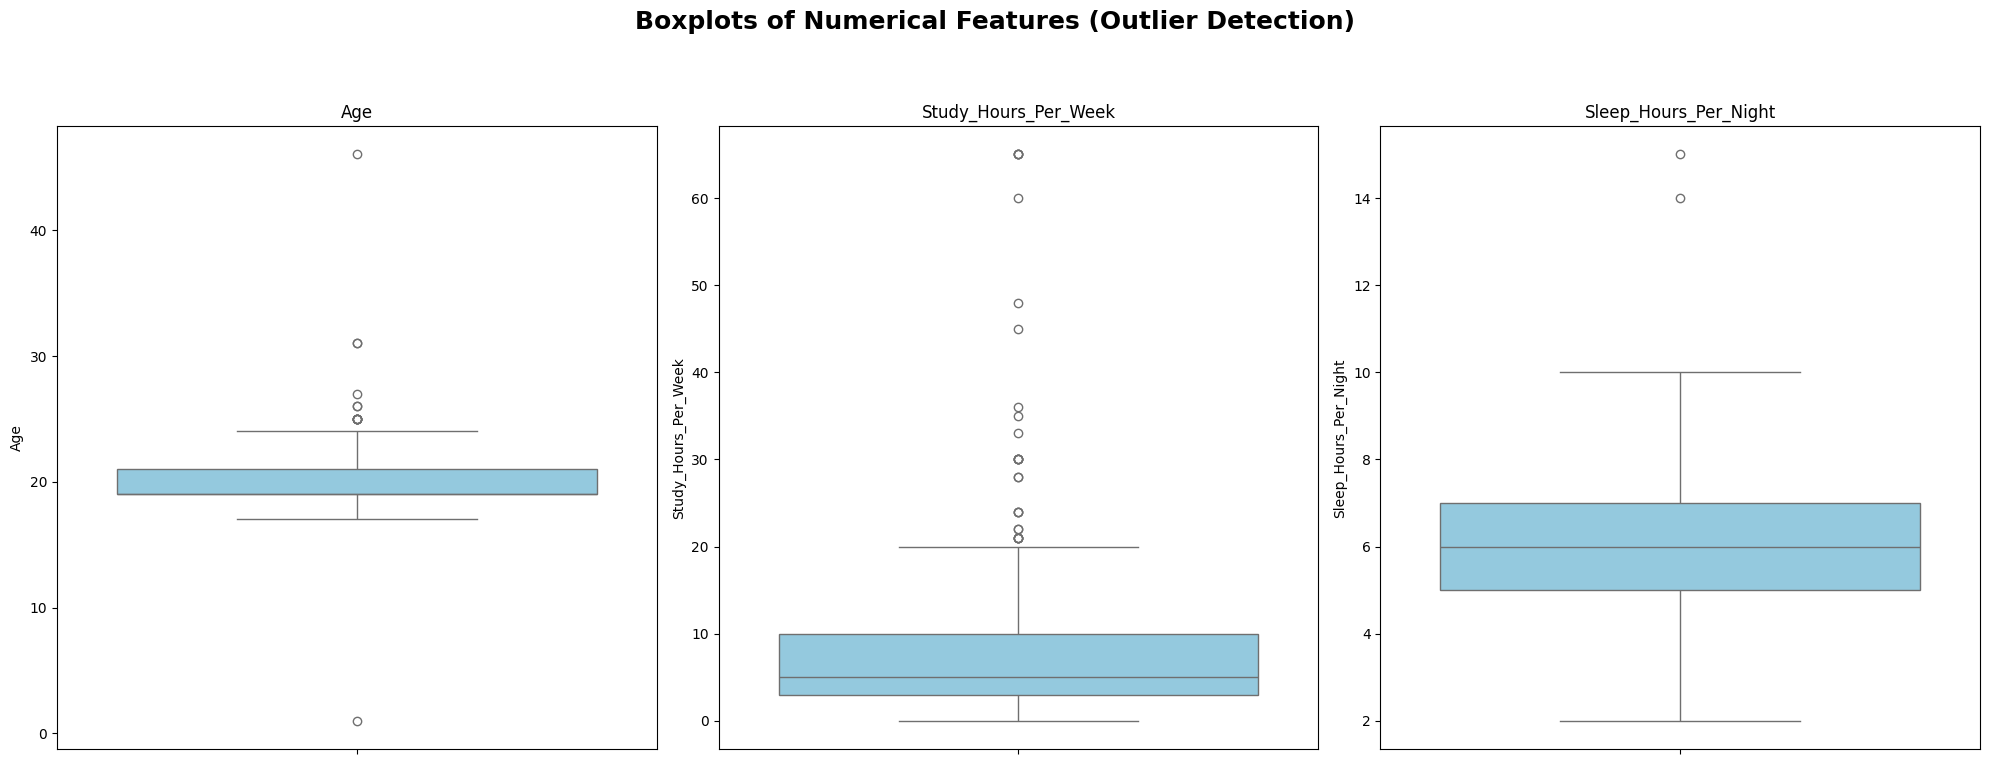

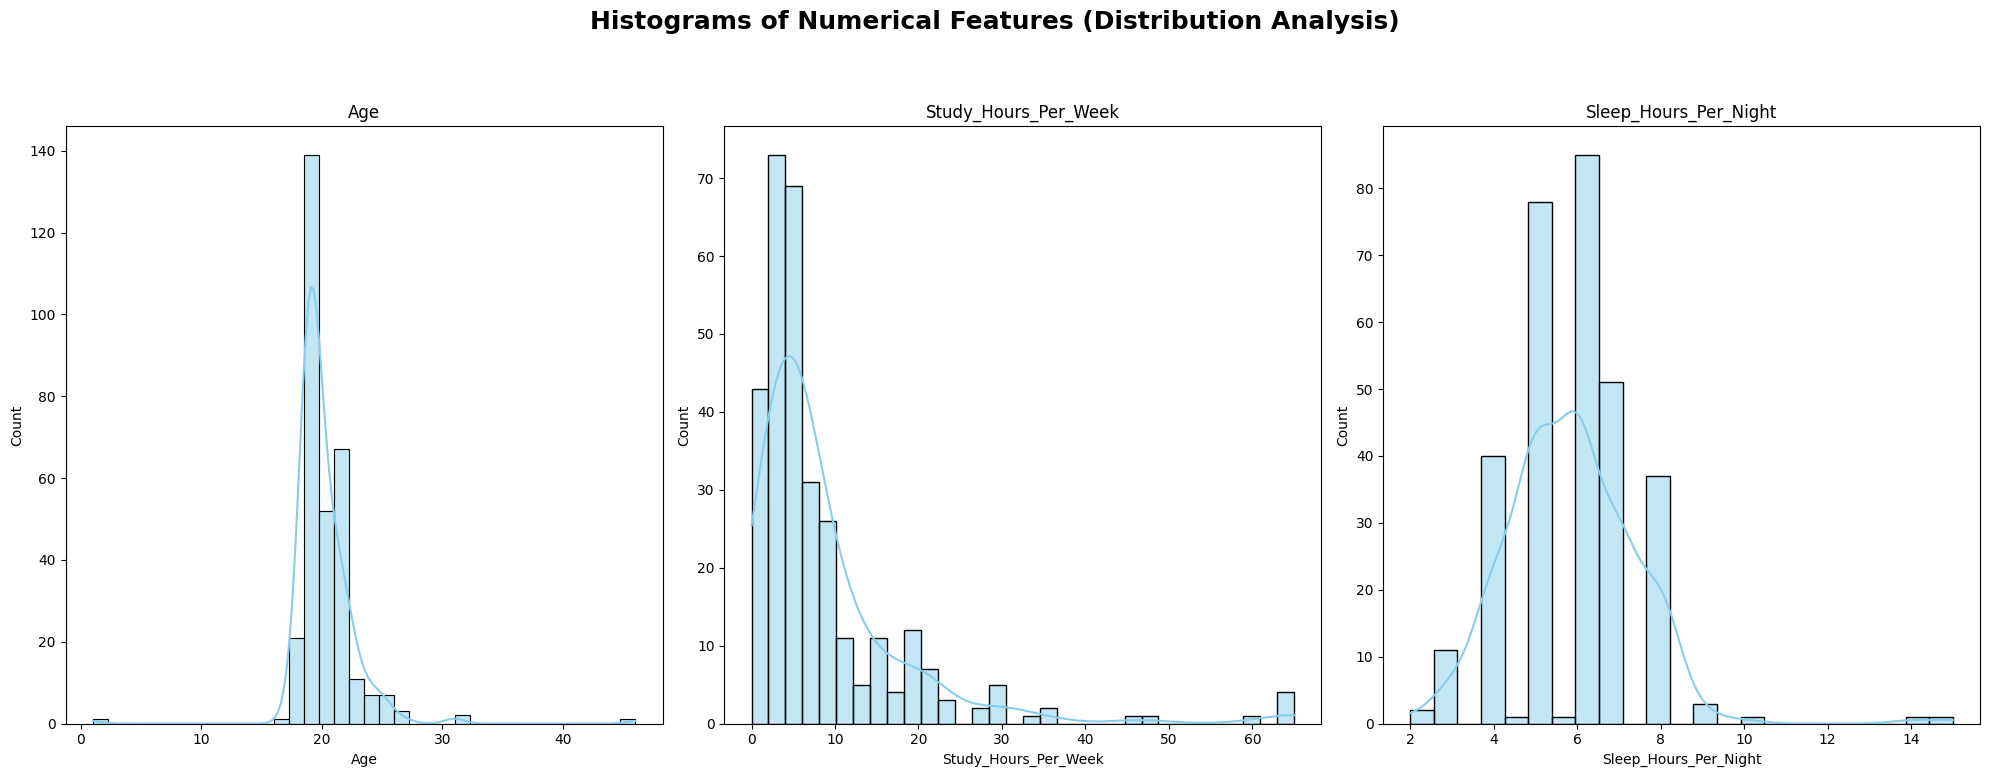

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot to Identify Outliers / Histogram to Understand the Distribution of Numerical Features

num_cols = df.select_dtypes(include='number').columns  # Select numeric columns

plt.figure(figsize=(20, 20))  # Adjust figure size

for idx, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, idx)  # 3 rows, 3 columns (adjust if needed)
    sns.boxplot(y=df[col], color='skyblue')
    plt.title(col)
    plt.suptitle("Boxplots of Numerical Features (Outlier Detection)", 
             fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()

plt.show()

plt.figure(figsize=(20, 20))  # Adjust figure size

for idx2, col2 in enumerate(num_cols, 1):
    plt.subplot(3, 3, idx2)  # 3 rows, 3 columns (adjust if needed)
    sns.histplot(df[col2], kde=True, color='skyblue')
    plt.title(col2)
    plt.suptitle("Histograms of Numerical Features (Distribution Analysis)", 
             fontsize=18, fontweight='bold', y=1.02)
    plt.tight_layout()

plt.show()


# Treatment for Outliers

In [19]:
df['Age'].describe()

count    312.000000
mean      20.179487
std        2.636589
min        1.000000
25%       19.000000
50%       19.000000
75%       21.000000
max       46.000000
Name: Age, dtype: float64

In [20]:
# Replace outliers with median or mean
median_age = df['Age'].median()
df.loc[df['Age'] < 10, 'Age'] = median_age  # or mean_age
df.loc[df['Age'] > 80, 'Age'] = median_age  # or mean_age

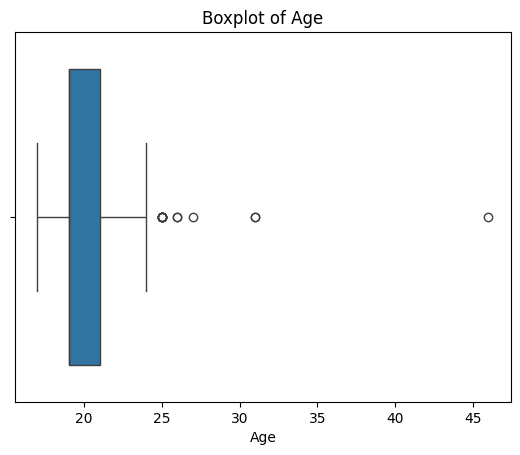

In [21]:
# Boxplot for Age
sns.boxplot(data=df, x='Age')
plt.title('Boxplot of Age')
plt.show()

# Encode Categorical Features

In [22]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Gender                         312 non-null    object
 1   Current_Level_of_Studies       312 non-null    object
 2   Field_of_Study                 312 non-null    object
 3   Type_of_Institution            312 non-null    object
 4   Academic_Satisfaction          312 non-null    object
 5   Academic_Engagement            312 non-null    object
 6   Academic_Workload              312 non-null    object
 7   Coursework_Pressure            312 non-null    object
 8   Academic_Performance           312 non-null    object
 9   Eating_Nutrition_Habits        312 non-null    object
 10  Physical_Activity_Freq         312 non-null    object
 11  Social_Support                 312 non-null    object
 12  Romantic_Satisfaction          312 non-null    object
 13  Finan

## Encode categorical features

In [23]:
df[non_numeric_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 19 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Gender                         312 non-null    object
 1   Current_Level_of_Studies       312 non-null    object
 2   Field_of_Study                 312 non-null    object
 3   Type_of_Institution            312 non-null    object
 4   Academic_Satisfaction          312 non-null    object
 5   Academic_Engagement            312 non-null    object
 6   Academic_Workload              312 non-null    object
 7   Coursework_Pressure            312 non-null    object
 8   Academic_Performance           312 non-null    object
 9   Eating_Nutrition_Habits        312 non-null    object
 10  Physical_Activity_Freq         312 non-null    object
 11  Social_Support                 312 non-null    object
 12  Romantic_Satisfaction          312 non-null    object
 13  Finan

In [24]:
df[non_numeric_cols].columns

Index(['Gender', 'Current_Level_of_Studies', 'Field_of_Study',
       'Type_of_Institution', 'Academic_Satisfaction', 'Academic_Engagement',
       'Academic_Workload', 'Coursework_Pressure', 'Academic_Performance',
       'Eating_Nutrition_Habits', 'Physical_Activity_Freq', 'Social_Support',
       'Romantic_Satisfaction', 'Financial_Stress', 'CoCurricular_Involvement',
       'Isolation_Frequency', 'Family_History_Mental_Illness',
       'Recent_Suicidal_Thoughts', 'Depressed_Anxious'],
      dtype='object')

In [25]:
# Encode for categorical variables (non-numeric)
# Automatically show value counts for all object columns

non_numeric_cols = df.select_dtypes(include=['object']).columns

for col in non_numeric_cols:
    print(f"\n--- {col} ---")
    print(df[col].value_counts())



--- Gender ---
Gender
Female    167
Male      145
Name: count, dtype: int64

--- Current_Level_of_Studies ---
Current_Level_of_Studies
Degree        167
Foundation    114
Diploma        31
Name: count, dtype: int64

--- Field_of_Study ---
Field_of_Study
STEM (e.g., Science, Technology, Engineering, Mathematics, etc.)                 272
Social Sciences (e.g., Psychology, Sociology, Education, Communication, etc.)     30
Other                                                                              8
Health Science                                                                     1
Aviation Management                                                                1
Name: count, dtype: int64

--- Type_of_Institution ---
Type_of_Institution
Private    160
Public     152
Name: count, dtype: int64

--- Academic_Satisfaction ---
Academic_Satisfaction
4 : Satisfied            151
3 : Neutral               95
5 : Very satisfied        41
2 : Dissatisfied          13
1 : Very dissatisfie

In [26]:
# Encoding categorical variables using LabelEncoder
encoder = LabelEncoder()

# List of categorical columns
categorical_columns = (['Gender', 'Current_Level_of_Studies', 'Field_of_Study',
       'Type_of_Institution', 'Academic_Satisfaction', 'Academic_Engagement',
       'Academic_Workload', 'Coursework_Pressure', 'Academic_Performance',
       'Eating_Nutrition_Habits', 'Physical_Activity_Freq', 'Social_Support',
       'Romantic_Satisfaction', 'Financial_Stress', 'CoCurricular_Involvement',
       'Isolation_Frequency', 'Family_History_Mental_Illness',
       'Recent_Suicidal_Thoughts', 'Depressed_Anxious'])

# Loop and encode each categorical column
for col in categorical_columns:
    if col in df.columns:
        df[col] = encoder.fit_transform(df[col].astype(str))

# --- Shift all encoded columns by +1 (so labels start from 1 instead of 0) ---
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col] + 1


In [31]:
# Check if the data converted
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 22 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            312 non-null    int64  
 1   Gender                         312 non-null    int64  
 2   Current_Level_of_Studies       312 non-null    int64  
 3   Field_of_Study                 312 non-null    int64  
 4   Type_of_Institution            312 non-null    int64  
 5   Academic_Satisfaction          312 non-null    int64  
 6   Study_Hours_Per_Week           312 non-null    int64  
 7   Academic_Engagement            312 non-null    int64  
 8   Academic_Workload              312 non-null    int64  
 9   Coursework_Pressure            312 non-null    int64  
 10  Academic_Performance           312 non-null    int64  
 11  Sleep_Hours_Per_Night          312 non-null    float64
 12  Eating_Nutrition_Habits        312 non-null    int

In [32]:
#save the cleaned data
df.to_csv('Cleaned_Form_Responses.csv', index=False)